# Model Evaluation

In [4]:
# import fundamental libraries
import tensorflow as tf
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import dependencies for image processing
from PIL import Image 
from tensorflow.keras.preprocessing.image import img_to_array

**Approach: Model Evaluation**

+ Performance Evaluation: Evalute Model Performance on: accuracy, loss, classification scores
+ Model Prediction: Predict labels with 5 images
+ Error Analysis

## Performance Evaluation

In [2]:
from model_evaluation_tools import model_performance_vis

+ Visualise the performance of model 1: ConvNeuralNet
+ Visualise the performance of model 2: DeepNeuralNet
+ Visualise the performance of model 3: ResNet
+ Compare 3 model performance simulations and conclude

**!!Fixed the issue**

KeyError: 'accuracy'

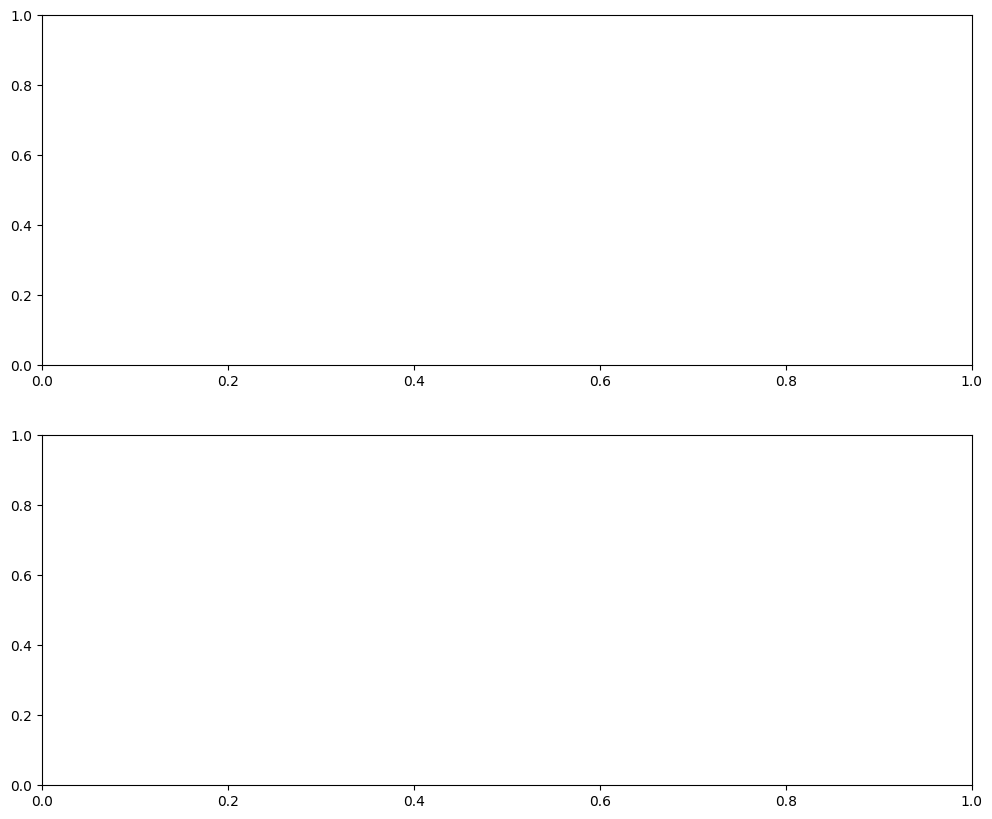

In [8]:
# load performance dataset
csv_file = "D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\model_development\\performance_data\\perform_dataset.csv"
perform_df = pd.read_csv(csv_file, index_col=0)
perform_df.columns = [column.capitalize() for column in perform_df.columns]
# perform_df.head()

# visualise model's performance 
fig, graph = plt.subplots(2,1, figsize=(12, 10))
# training set
num_epochs = perform_df.index
train_acc = perform_df["accuracy"]
train_loss = perform_df["loss"]

# validation set
val_acc = perform_df["val_accuracy"]
val_loss = perform_df["val_loss"]

graph1 = model_performance_vis(num_epochs, train_acc, val_acc, "Accuracy", ax=graph[0])
graph2 = model_performance_vis(num_epochs, train_loss, val_loss, "Loss", ax=graph[1])

## Model Prediction

In [3]:
from tensorflow.keras.models import load_model
from model_selection import ConvNeuralNet

In [5]:
# Load the model
model1 = load_model("D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\models\\mobile_recon_model1.keras")


In [11]:
# convert images into jpg
# mobile images: testcase 
or_img_path = "D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\model_development\\images"
images = os.listdir(or_img_path)

for i,image in enumerate(images): 
  # create image files
  img_file = os.path.join(or_img_path, image)
  img = Image.open(img_file)

  # save new image files with extension("JPG")
  new_img_file = f"new_image{i}.png"
  new_img_path = os.path.join(or_img_path, new_img_file)
  img.save(new_img_path, format="PNG")
  print(f"Image successfully converted to {new_img_path}")

Image successfully converted to D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\model_development\images\new_image0.png
Image successfully converted to D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\model_development\images\new_image1.png
Image successfully converted to D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\model_development\images\new_image2.png
Image successfully converted to D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\model_development\images\new_image3.png
Image successfully converted to D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\model_development\images\new_image4.png


In [25]:
# Preprocess images 
# Load and preprocess the image
 # Path to the first image
def preprocess_image(image_path: str) -> np.ndarray:
  img = Image.open(image_path).resize((330, 330)).convert("RGB")  # Resize to the model's expected input size
  img_array = img_to_array(img)  # Convert to array
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)
  img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
  return img_array

# Images: testcase of 5 samples
path = or_img_path
images = os.listdir(path)
images = [os.path.join(path, img) for img in images if "new" in img]


# Predict the label
predictions = []
for i in range(len(images)):
  image_i = preprocess_image(image_path = images[i])
  ylabel = model1.predict(image_i)
  predictions.append(ylabel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


d:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Prediction Table

In [53]:
# Define constants for creating a prediction table
company_names = "Apple	Motorola	Nokia	OnePlus	Poco	Redmi	Samsung	Xiaomi"
company_labels = company_names.split()
img_files = [img for img in os.listdir(or_img_path) if "new" in img]
print(company_labels)
print(img_files)

# Construct dataframe
prediction_flat = [pred.flatten() for pred in predictions]
prediction_df = pd.DataFrame(prediction_flat, columns=company_labels, index=img_files)

prediction_df.head(10)

['Apple', 'Motorola', 'Nokia', 'OnePlus', 'Poco', 'Redmi', 'Samsung', 'Xiaomi']
['new_image0.png', 'new_image1.png', 'new_image2.png', 'new_image3.png', 'new_image4.png']


,Apple,Motorola,Nokia,OnePlus,Poco,Redmi,Samsung,Xiaomi
new_image0.png,0.101118,0.051759,0.315810,0.050165,0.032718,0.031261,0.202723,0.214448
new_image1.png,0.124861,0.072144,0.164724,0.061278,0.022094,0.032458,0.312032,0.210409
new_image2.png,0.162232,0.039003,0.082525,0.038279,0.007937,0.016993,0.474665,0.178365
new_image3.png,0.074124,0.103555,0.264574,0.083404,0.038229,0.036353,0.213660,0.186102
new_image4.png,0.148598,0.052184,0.080363,0.048657,0.009976,0.020740,0.461146,0.178336


## Visualise Smartphone images

In [70]:
# format data with 4 decimals
prediction_df["Apple"] = prediction_df["Apple"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Motorola"] = prediction_df["Motorola"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Nokia"] = prediction_df["Nokia"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["OnePlus"] = prediction_df["OnePlus"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Poco"] = prediction_df["Poco"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Redmi"] = prediction_df["Redmi"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Samsung"] = prediction_df["Samsung"].apply(lambda x: np.round(x, 3)*100) 
prediction_df["Xiaomi"] = prediction_df["Xiaomi"].apply(lambda x: np.round(x, 3)*100) 

In [71]:
prediction_df

,Apple,Motorola,Nokia,OnePlus,Poco,Redmi,Samsung,Xiaomi
new_image0.png,10.1,5.2,31.6,5.0,3.3,3.1,20.3,21.4
new_image1.png,12.5,7.2,16.5,6.1,2.2,3.2,31.2,21.0
new_image2.png,16.2,3.9,8.3,3.8,0.8,1.7,47.5,17.8
new_image3.png,7.4,10.4,26.5,8.3,3.8,3.6,21.4,18.6
new_image4.png,14.9,5.2,8.0,4.9,1.0,2.1,46.1,17.8


**Conclusion**: There need more images to be collected to retrain the model.